<a href="https://colab.research.google.com/github/kimdesok/Text_Classification_Clustering/blob/main/Semi_supervised_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

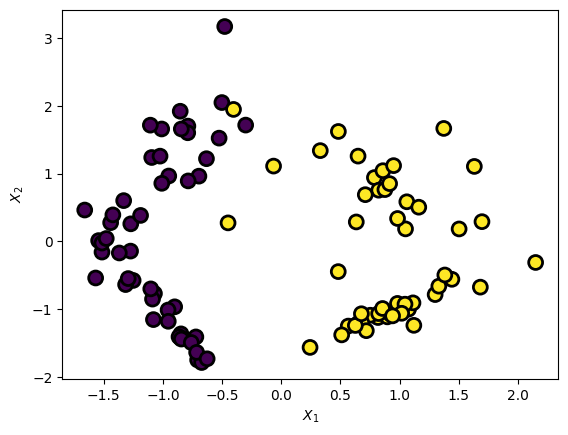

In [45]:
# prepare semi-supervised learning dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

# define dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

plt.scatter(X[:,0], X[:,1], marker='o', c=y, \
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

85 85
<class 'numpy.ndarray'>
Labeled Train Set: (42, 2) (42,)
Unlabeled Train Set: (43, 2) (43,)
Test Set: (15, 2) (15,)


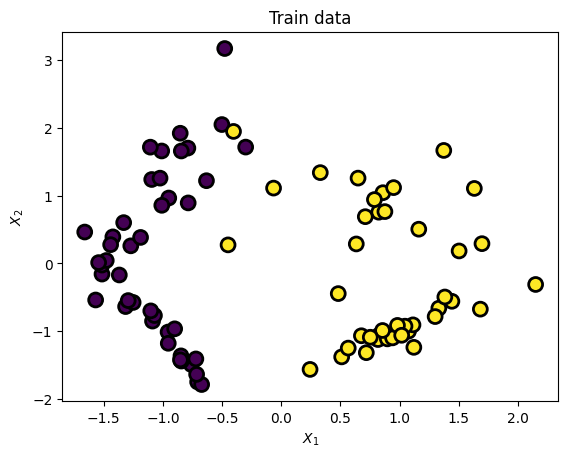

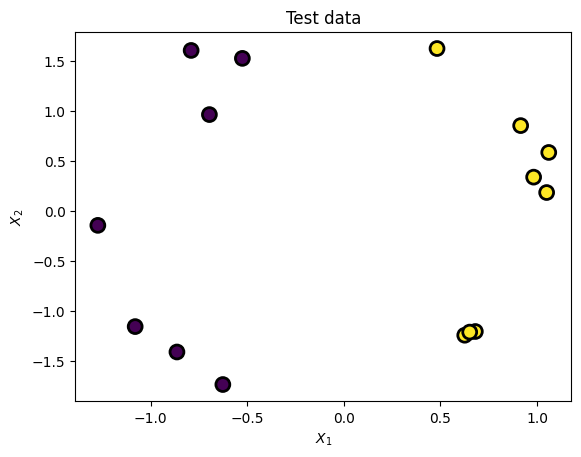

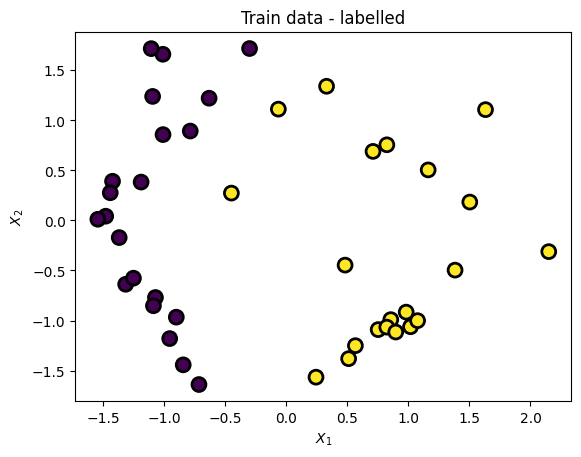

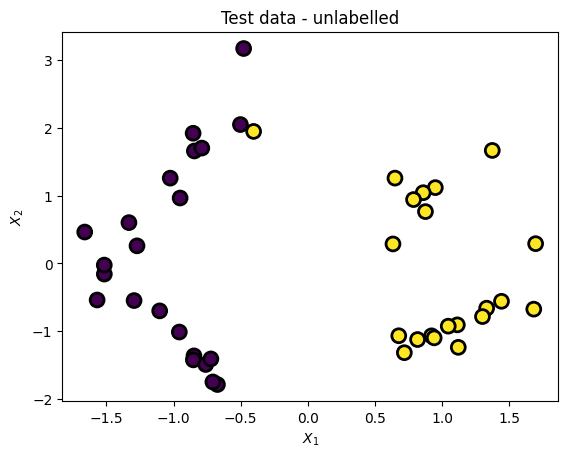

In [46]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify=y)
print(len(X_train), len(y_train))
print(type(X_train))
# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)
# summarize training set size
print('Labeled Train Set:', X_train_lab.shape, y_train_lab.shape)
print('Unlabeled Train Set:', X_test_unlab.shape, y_test_unlab.shape)
#print(X_test_unlab[:10])
#print(y_test_unlab[:10])
# summarize test set size
print('Test Set:', X_test.shape, y_test.shape)

plt.title("Train data")
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train, \
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

plt.title("Test data")
plt.scatter(X_test[:,0], X_test[:,1], marker='o', c=y_test, \
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

plt.title("Train data - labelled")
plt.scatter(X_train_lab[:,0], X_train_lab[:,1], marker='o', c=y_train_lab, \
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

plt.title("Test data - unlabelled")
plt.scatter(X_test_unlab[:,0], X_test_unlab[:,1], marker='o', c=y_test_unlab, \
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## Labelling the unlabeled text data
>* by applying the model trained with X_train_lab

In [47]:
# baseline performance on the semi-supervised learning dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# define model
model = LogisticRegression()
# fit model on labeled dataset
model.fit(X_train_lab, y_train_lab)
# make predictions on hold out test set
yhat = model.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 100.000


Element -1 occurs 43 time(s).
Element 0 occurs 21 time(s).
Element 1 occurs 21 time(s).


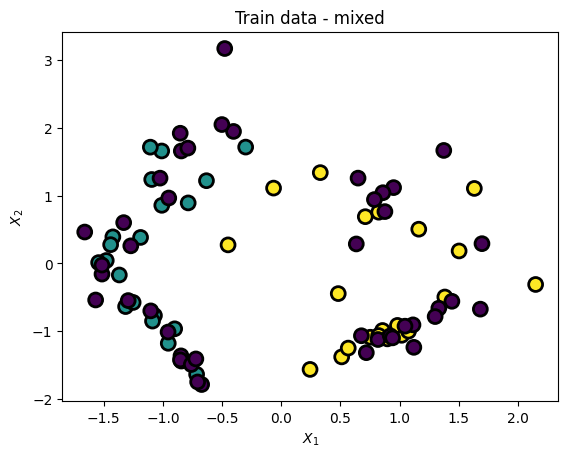

In [55]:
# evaluate label propagation on the semi-supervised learning dataset
from numpy import concatenate
import numpy as np

from sklearn.semi_supervised import LabelPropagation

def count_unique(y_train_mixed):
  # Get the unique elements and their counts
  unique_elements, counts = np.unique(y_train_mixed, return_counts=True)

  # Print the unique elements and their counts
  for element, count in zip(unique_elements, counts):
    print(f"Element {element} occurs {count} time(s).")

# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))

# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]

# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))

count_unique(y_train_mixed)

plt.title("Train data - mixed")
plt.scatter(X_train_mixed[:,0], X_train_mixed[:,1], marker='o', c=y_train_mixed, \
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

Element 0 occurs 44 time(s).
Element 1 occurs 41 time(s).
Accuracy: 100.000


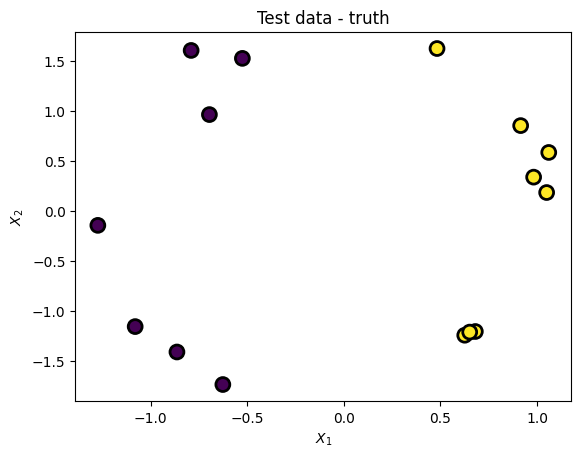

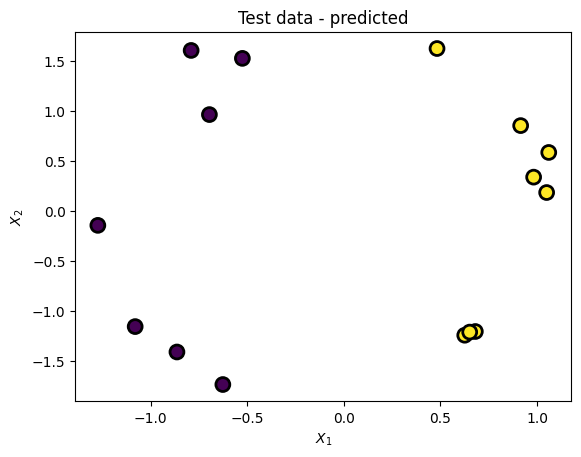

In [56]:
# define model
model = LabelPropagation()

# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)

count_unique(model.transduction_)

# make predictions on hold out test set
yhat = model.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

plt.title("Test data - truth")
plt.scatter(X_test[:,0], X_test[:,1], marker='o', c=y_test, \
            s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

plt.title("Test data - predicted")
plt.scatter(X_test[:,0], X_test[:,1], marker='o', c=yhat, \
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [50]:
# get labels for entire training dataset data
tran_labels = model.transduction_
count_unique(tran_labels)


Element 0 occurs 44 time(s).
Element 1 occurs 41 time(s).


Accuracy: 100.000


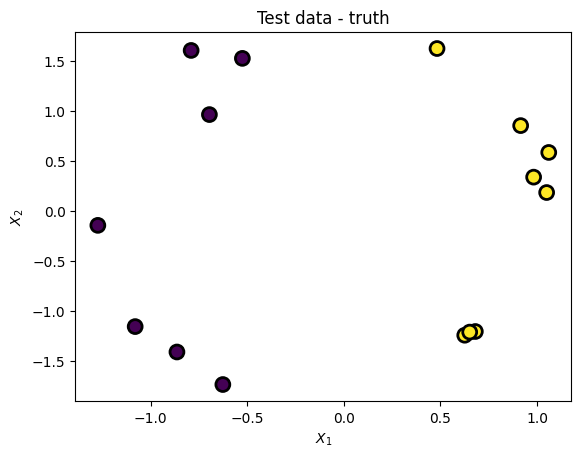

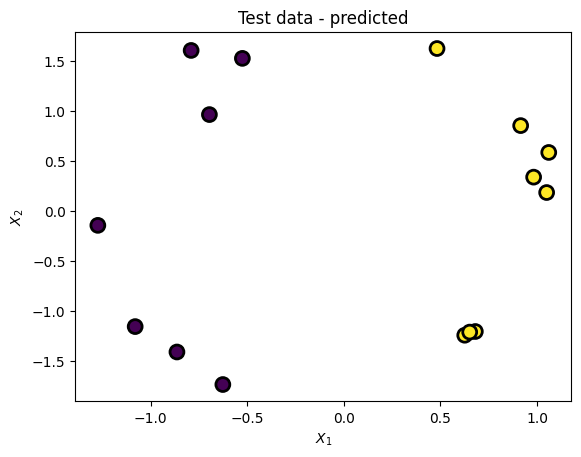

In [53]:
# define supervised learning model
model2 = LogisticRegression()
# fit supervised learning model on entire training dataset
model2.fit(X_train_mixed, tran_labels)

# make predictions on hold out test set
yhat = model2.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

plt.title("Test data - truth")
plt.scatter(X_test[:,0], X_test[:,1], marker='o', c=y_test, \
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

plt.title("Test data - predicted")
plt.scatter(X_test[:,0], X_test[:,1], marker='o', c=yhat, \
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()